## 📉 회귀 분석으로 스마트폰 사용이 시험 점수에 영향을 주는지 알아봅시다

이번에는 스마트폰 사용 시간이 시험 점수에 **어떻게 영향을 주는지**
수학적으로 분석해보는 **회귀 분석**을 해볼 거예요.

"스마트폰을 오래 쓸수록 점수가 떨어질까?"
"그게 정말 맞는지, 그냥 느낌일 뿐인지 확인해볼 수는 없을까?"

→ 이럴 때 회귀 분석을 사용합니다!


In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터
data = {
    "공부시간(시간)": [1, 2, 3, 4, 5, 2, 6, 3, 5, 4],
    "스마트폰 사용시간(시간)": [5, 4, 3, 3, 2, 6, 1, 4, 2, 3],
    "시험점수": [40, 50, 60, 70, 80, 45, 90, 60, 85, 75]
}

df = pd.DataFrame(data)
df


,공부시간(시간),스마트폰 사용시간(시간),시험점수
0,1,5,40
1,2,4,50
2,3,3,60
3,4,3,70
4,5,2,80
5,2,6,45
6,6,1,90
7,3,4,60
8,5,2,85
9,4,3,75


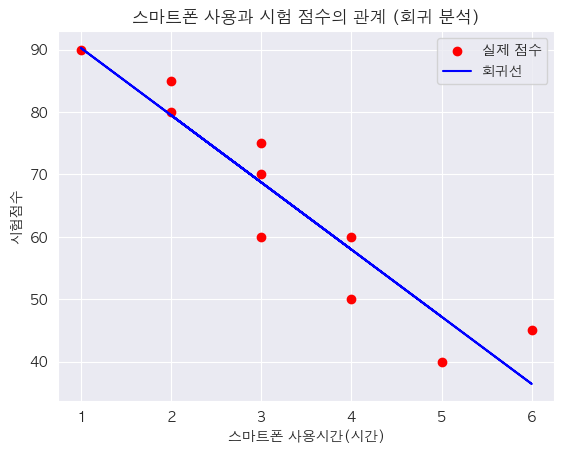

In [4]:

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.font_manager as fm
import platform

# 시스템에 따라 기본 한글 폰트 설정
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux or 기타
    plt.rcParams['font.family'] = 'NanumGothic'

# X는 독립 변수 (스마트폰 사용시간), y는 종속 변수 (시험 점수)
X = df[["스마트폰 사용시간(시간)"]]  # 2차원 배열로 만들어야 함
y = df["시험점수"]

# 선형 회귀 모델 만들고 학습
model = LinearRegression()
model.fit(X, y)

# 회귀선 그리기
plt.scatter(X, y, color='red', label="실제 점수")
plt.plot(X, model.predict(X), color='blue', label="회귀선")
plt.xlabel("스마트폰 사용시간(시간)")
plt.ylabel("시험점수")
plt.title("스마트폰 사용과 시험 점수의 관계 (회귀 분석)")
plt.legend()
plt.grid(True)
plt.show()


In [7]:

# 기울기(계수)와 절편
coef = model.coef_[0]
intercept = model.intercept_

print(f"회귀식: 점수 = {coef:.2f} × 스마트폰 사용시간 + {intercept:.2f}")


회귀식: 점수 = -10.77 × 스마트폰 사용시간 + 101.04


### 🧠 해석해볼까요?

- `기울기`가 **음수(-10.77)** 이니까, 스마트폰을 **1시간 더 사용하면 점수가 약 10점 줄어든다**는 뜻이에요.
- `절편`은 스마트폰을 전혀 안 쓴 경우 예상 점수예요. (이 예제에서는 약 101점)

🎯 결론: **스마트폰 사용 시간이 늘어날수록 시험 점수가 줄어드는 경향**이 있어 보이네요!

## ❓ 회귀식에 100점이 넘는 값이 나오는 이유는?

예를 들어 이런 회귀식이 나왔다고 해봅시다:

> **점수 = -10.77 × 스마트폰 사용시간 + 101.04**

"어? 스마트폰을 0시간 쓰면 점수가 101점인데,
시험은 **100점이 만점 아닌가요?** 이 식 이상한 거 아닌가요?"

👉 **좋은 질문이에요!**

---

### 🎯 현실과 회귀식의 차이

회귀식은 **전체 데이터를 가장 잘 설명하는 '직선' 하나를 찾는 것**이에요.
그래서 현실에 없는 점수(예: 101점)도 **"수학적으로 계산된 예측값"**으로 나올 수 있어요.

> 회귀식은 "**정확한 점수**"를 알려주는 게 아니라,
> "**변수들 사이의 경향(패턴)**"을 알려주는 도구예요.

---

### 🔍 이 식이 알려주는 진짜 의미

- 스마트폰을 1시간 더 쓰면, 점수가 **평균적으로 약 10.8점 줄어들 수 있다**는 의미예요.
- 0시간일 때 101점이라는 건 그냥 **선의 출발점**, 즉 **절편(intercept)**일 뿐이에요.
- 실제로는 점수가 100점을 넘지 않도록 **해석하거나 제한해서 사용**해야 해요.

---

### ✅ 마무리 정리

- 회귀식에서 **100점이 넘는 값이 나와도 걱정하지 마세요!**
- 중요한 건 "**스마트폰을 많이 쓰면 점수가 얼마나 줄어드는지**"를 아는 거예요.
- 현실에서는 점수의 범위를 **0~100 사이로 자르고**,
  회귀식은 **그 경향을 파악하는 참고 도구**로 쓰면 돼요 😊



## 🤔 model.fit(X, y) 이게 무슨 뜻일까요?

이 코드는 **선형 회귀 모델이 데이터를 보고 '최고의 직선'을 찾는 과정**을 말해요!

예를 들어 아래처럼 데이터가 있다고 해볼게요:

| 스마트폰 사용시간 | 시험 점수 |
|------------------|------------|
| 1시간            | 90점       |
| 2시간            | 80점       |
| 3시간            | 70점       |

이 데이터를 보고 우리가 할 일은?

> **"이 점수들을 가장 잘 설명하는 직선을 그려라!"**

---

### 📐 그럼 '직선'은 어떻게 정할까요?

직선의 공식은 이렇게 생겼어요:

> **점수 = a × 스마트폰사용시간 + b**

여기서,
- `a`: 기울기 (사용 시간이 늘어나면 점수가 얼마나 바뀌는지)
- `b`: 절편 (스마트폰을 아예 안 썼을 때 예상 점수)

---

### 🎯 model.fit(X, y)가 하는 일

`model.fit(X, y)`는 이런 작업을 해요:

1. 여러 개의 `a`, `b` 값을 막 넣어봅니다.
2. 각 직선이 데이터와 얼마나 잘 맞는지 계산합니다.
   - 예측 값과 실제 값 차이(오차)를 구해요.
   - 예: (예측 - 실제)의 제곱을 모두 더함
3. 오차가 가장 작은 `a`, `b` 값을 찾아냅니다.
   → 이것이 **가장 잘 맞는 직선**이 되는 거예요!

이걸 수학적으로는 **"최소제곱법 (Least Squares)"**이라고 불러요.

---

### ✅ 정리하면

- `model.fit(X, y)`는 데이터를 보고
- "**오차가 가장 적은 직선**"을 찾고
- 그 직선의 기울기 `a`, 절편 `b`를 모델에 저장해요.

이제 `model.predict()`를 쓰면,
- 새 스마트폰 사용 시간에 대해
- 점수를 예측해줄 수 있게 되는 거예요! 📈


## 🧮 선형 회귀 직접 계산해보기 (기울기와 절편 수식 유도)

`LinearRegression().fit(X, y)` 없이도 직접 회귀식을 만들 수 있어요!
우리가 원하는 건 이 공식이에요:

> **점수 = a × 스마트폰 사용시간 + b**

여기서 `a`는 기울기, `b`는 절편입니다.

In [8]:
# 스마트폰 사용 시간과 점수 데이터
x = df["스마트폰 사용시간(시간)"].values
y = df["시험점수"].values

# 평균값
x_mean = x.mean()
y_mean = y.mean()

# 분자: (x_i - x̄)(y_i - ȳ) 의 합
numerator = ((x - x_mean) * (y - y_mean)).sum()

# 분모: (x_i - x̄)^2 의 합
denominator = ((x - x_mean) ** 2).sum()

# 기울기 a, 절편 b 계산
a = numerator / denominator
b = y_mean - a * x_mean

print(f"우리가 직접 구한 회귀식: 점수 = {a:.2f} × 스마트폰시간 + {b:.2f}")


우리가 직접 구한 회귀식: 점수 = -10.77 × 스마트폰시간 + 101.04


## 🧮 수식 설명: 기울기 a 와 절편 b 는 어떻게 구할까요?

회귀식의 기본 형태는 다음과 같아요:

> **점수 = a × 스마트폰사용시간 + b**

- `a`는 **기울기**: 스마트폰 사용 시간이 1시간 늘어날 때, 점수가 얼마나 바뀌는지
- `b`는 **절편**: 스마트폰을 **0시간** 썼을 때의 예상 점수 (출발점)

---

### 📐 기울기 a 계산 공식

$$
a = \frac{ \sum (x_i - \bar{x})(y_i - \bar{y}) }{ \sum (x_i - \bar{x})^2 }
$$


#### 이게 무슨 뜻일까요?

- `x_i - x̄`: 각 사람의 스마트폰 사용 시간이 **평균에서 얼마나 벗어났는지**
- `y_i - ȳ`: 각 사람의 시험 점수가 **평균에서 얼마나 벗어났는지**

→ 분자는 이 두 편차를 **곱한 값들의 합**이에요.

👉 즉, "스마트폰을 많이 쓴 사람의 점수가 낮았다" 같은 **같은 방향의 변화가 많을수록 값이 커져요.**

- 분모는 `x_i - x̄`의 **제곱**이니까,
  스마트폰 사용 시간의 **흩어진 정도(=분산)**만 계산하는 거예요.

---

### 🎯 결론

- 분자: "x와 y가 **같은 방향으로** 움직인 정도"
- 분모: "x가 평균에서 **얼마나 흩어져 있는지**"

그래서 `a`는:

> "**x가 변할 때 y가 얼마나 같이 변하는지**"를 알려주는 값이에요.
> 즉, **스마트폰 사용이 점수에 얼마나 영향을 주는지를 수학적으로 계산**한 거예요!

---

### 절편 b는?


$$
b = \bar{y} - a \cdot \bar{x}
$$


- 평균값을 기준으로 기울기만큼 빼주는 방식이에요.
- **기울기 `a`가 정해지면**, 출발점인 `b`도 자연스럽게 결정돼요.
